In [1]:
#Importovanie potrebných knižních

import pandas as pan
#- Na manipuláciu a analýzu údajov.

import numpy as np
#- Na vedecké výpočty

import matplotlib.pyplot as plt
#- Na vykreslenie grafov

import seaborn as sns
#- Na vykreslenie grafov

from sklearn import preprocessing
#- Na preškálovanie dát

from sklearn.metrics import accuracy_score
#- Na testovanie neurónky

In [2]:
class AdalineGD(object):
    
    def __init__(self, eta=0.0001, n_iter=1000, random_state=1):
        self.eta = eta
        self.n_iter = n_iter
        self.random_state = random_state

    def fit(self, X, y):
        self.w_ = np.zeros(1+X.shape[1])   
        self.cost_ = []

        for i in range(self.n_iter):
            output = self.activation(X)
            errors = (y - output)
            self.w_[1:] += self.eta * X.T.dot(errors)
            self.w_[0] += self.eta * errors.sum()
            cost = (errors**2).sum() / 2.0
            self.cost_.append(cost)
            plt.plot(self.cost_)
        return self

    def net_input(self, X):
        return np.dot(X, self.w_[1:]) + self.w_[0]

    def activation(self, X):
        return self.net_input(X)

    def predict(self, X):
        return np.where(self.activation(X) >= 0.0, 1, -1)

In [3]:
#Načítanie a menšie upravenie datasetu
CHAMP=pan.read_csv('riot_champion.csv',index_col=None)
CHAMP.tag1=CHAMP.tag1.str.replace("'","")
CHAMP.tag1=CHAMP.tag1.str.replace("[","")
CHAMP.tag1=CHAMP.tag1.str.replace("]","")
CHAMP.tag2=CHAMP.tag2.str.replace("'","")
CHAMP.tag2=CHAMP.tag2.str.replace("[","")
CHAMP.tag2=CHAMP.tag2.str.replace("]","")
CHAMP

,key,name,title,tag1,tag2,partype,rangecategory,info.attack,info.defense,info.magic,...,stats.spellblock,stats.spellblockperlevel,stats.hpregen,stats.hpregenperlevel,stats.mpregen,stats.mpregenperlevel,stats.attackdamage,stats.attackdamageperlevel,stats.attackspeedperlevel,stats.attackspeed
0,266,Aatrox,the Darkin Blade,Fighter,Tank,Blood Well,Melee,8,4,3,...,32.1,1.25,3.00,1.00,0.000,0.000,60.0000,5.0000,2.500,0.651
1,103,Ahri,the Nine-Tailed Fox,Mage,Assassin,Mana,Ranged,3,4,8,...,30.0,0.50,6.50,0.60,8.000,0.800,53.0400,3.0000,2.000,0.668
2,84,Akali,the Rogue Assassin,Assassin,Null,Energy,Melee,5,3,8,...,37.0,1.25,8.00,0.50,50.000,0.000,62.4000,3.3000,3.200,0.625
3,12,Alistar,the Minotaur,Tank,Support,Mana,Melee,6,9,5,...,32.1,1.25,8.50,0.85,8.500,0.800,62.0000,3.7500,2.125,0.625
4,32,Amumu,the Sad Mummy,Tank,Mage,Mana,Melee,2,6,8,...,32.1,1.25,9.00,0.85,7.382,0.525,53.3800,3.8000,2.180,0.736
5,34,Anivia,the Cryophoenix,Mage,Support,Mana,Ranged,1,4,10,...,30.0,0.50,5.50,0.55,8.000,0.800,51.3760,3.2000,1.680,0.625
6,1,Annie,the Dark Child,Mage,Null,Mana,Ranged,2,3,10,...,30.0,0.50,5.50,0.55,8.000,0.800,50.4100,2.6250,1.360,0.579
7,523,Aphelios,the Weapon of the Faithful,Marksman,Null,Mana,Ranged,6,2,1,...,26.0,0.50,3.25,0.55,6.500,0.400,57.0000,2.2000,2.100,0.640
8,22,Ashe,the Frost Archer,Marksman,Support,Mana,Ranged,7,3,2,...,30.0,0.50,3.50,0.55,6.972,0.400,61.0000,2.9600,3.330,0.658
9,136,Aurelion Sol,The Star Forger,Mage,Null,Mana,Ranged,2,3,8,...,30.0,0.50,7.00,0.60,6.000,0.800,57.0000,3.2000,1.360,0.625


In [4]:
#Rozdelenie datasetu na dva datasety pre trénovacie a testovacie údaje
CHAMP_TEST=CHAMP.iloc[CHAMP.key.count()-40:CHAMP.key.count()]
CHAMP_TRENOVACIE=CHAMP.iloc[0:CHAMP.key.count()-40]
CHAMP_TEST=CHAMP_TEST.sort_values(by=['rangecategory'])
CHAMP_TRENOVACIE=CHAMP_TRENOVACIE.sort_values(by=['rangecategory'])
print("Počet Championov: ",CHAMP.key.count(),"\nPočet Championov na trénovanie: ",CHAMP_TRENOVACIE.key.count(),"\nPočet Championov na testovanie: ",CHAMP_TEST.key.count())


Počet Championov:  148 
Počet Championov na trénovanie:  108 
Počet Championov na testovanie:  40


In [5]:
Ranged=CHAMP_TRENOVACIE.key[CHAMP_TRENOVACIE.rangecategory=="Ranged"].count()
Mage=CHAMP_TRENOVACIE.key[(CHAMP_TRENOVACIE.tag1=="Mage")&(CHAMP_TRENOVACIE.rangecategory=="Ranged")].count()
ADC=CHAMP_TRENOVACIE.key[(CHAMP_TRENOVACIE.tag1=="Marksman")&(CHAMP_TRENOVACIE.rangecategory=="Ranged")].count()
RSupp=CHAMP_TRENOVACIE.key[(CHAMP_TRENOVACIE.tag1=="Support")&(CHAMP_TRENOVACIE.rangecategory=="Ranged")].count()
RAssassin=CHAMP_TRENOVACIE.key[(CHAMP_TRENOVACIE.tag1=="Assassin")&(CHAMP_TRENOVACIE.rangecategory=="Ranged")].count()
RFighter=CHAMP_TRENOVACIE.key[(CHAMP_TRENOVACIE.tag1=="Fighter")&(CHAMP_TRENOVACIE.rangecategory=="Ranged")].count()

Melee=CHAMP_TRENOVACIE.key[CHAMP_TRENOVACIE.rangecategory=="Melee"].count()
Fighter=CHAMP_TRENOVACIE.key[(CHAMP_TRENOVACIE.tag1=="Fighter")&(CHAMP_TRENOVACIE.rangecategory=="Melee")].count()
Tank=CHAMP_TRENOVACIE.key[(CHAMP_TRENOVACIE.tag1=="Tank")&(CHAMP_TRENOVACIE.rangecategory=="Melee")].count()
Assassin=CHAMP_TRENOVACIE.key[(CHAMP_TRENOVACIE.tag1=="Assassin")&(CHAMP_TRENOVACIE.rangecategory=="Melee")].count()
MSupp=CHAMP_TRENOVACIE.key[(CHAMP_TRENOVACIE.tag1=="Support")&(CHAMP_TRENOVACIE.rangecategory=="Melee")].count()
MMage=CHAMP_TRENOVACIE.key[(CHAMP_TRENOVACIE.tag1=="Mage")&(CHAMP_TRENOVACIE.rangecategory=="Melee")].count()
print("Prehľad Championov na základe ich MAIN role: \n\nPočet Ranged Championov: ",Ranged,"\nPočet Mágov: ",Mage,"\nPočet ADC: ",ADC,"\nPočet Supp:",RSupp,"\nPočet Assasinov:",RAssassin)
print("\n\nPočet Melee Championov: ",Melee,"\nPočet Supp:",MSupp,"\nPočet Assasinov:",Assassin,"\nPočet Fighterov:",Fighter,"\nPočet Tankov:",Tank)

Prehľad Championov na základe ich MAIN role: 

Počet Ranged Championov:  45 
Počet Mágov:  19 
Počet ADC:  18 
Počet Supp: 6 
Počet Assasinov: 2


Počet Melee Championov:  58 
Počet Supp: 2 
Počet Assasinov: 11 
Počet Fighterov: 27 
Počet Tankov: 18


In [6]:
#Načítanie trénovacích údajov
X=CHAMP_TRENOVACIE.iloc[5:CHAMP_TRENOVACIE.key.count()+5,7:30].values
X

array([[7.   , 5.   , 6.   , ..., 3.5  , 3.48 , 0.638],
       [4.   , 6.   , 7.   , ..., 4.   , 1.   , 0.625],
       [8.   , 5.   , 2.   , ..., 4.   , 3.   , 0.711],
       ...,
       [4.   , 3.   , 7.   , ..., 3.1  , 2.61 , 0.644],
       [1.   , 1.   , 9.   , ..., 2.5  , 3.5  , 0.625],
       [9.   , 3.   , 1.   , ..., 3.   , 1.6  , 0.625]])

In [7]:
#Načítanie cielových skupín
y=np.where(CHAMP_TRENOVACIE.rangecategory.str.contains("Melee"),-1,1)
y=y[5:]
y

array([-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1])

Grafická vizualizácia Meele a Ranged championov na základe Attack damage a Attack damage per level


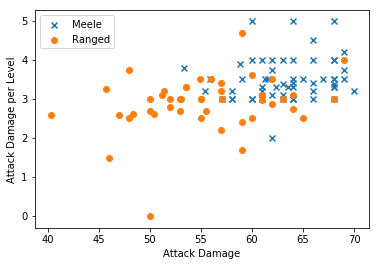

In [8]:
Pocet_prvej_Skupiny=CHAMP_TRENOVACIE.rangecategory.str.count("Melee").sum()

plt.scatter(X[0:Pocet_prvej_Skupiny,17],X[0:Pocet_prvej_Skupiny,18],marker='x',label='Meele') 
plt.scatter(X[Pocet_prvej_Skupiny:CHAMP_TRENOVACIE.key.count(),17],X[Pocet_prvej_Skupiny:CHAMP_TRENOVACIE.key.count(),18],marker='o',label='Ranged')

plt.xlabel('Attack Damage') 
plt.ylabel('Attack Damage per Level') 
plt.legend()    

print("Grafická vizualizácia Meele a Ranged championov na základe Attack damage a Attack damage per level");

Grafická vizualizácia Meele a Ranged championov na základe HP a HP per level


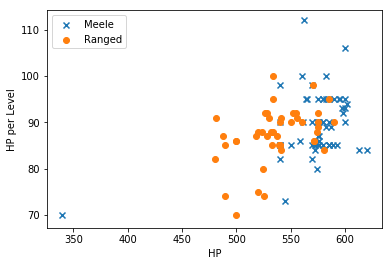

In [9]:
plt.scatter(X[0:Pocet_prvej_Skupiny,6],X[0:Pocet_prvej_Skupiny,7],marker='x',label='Meele') 
plt.scatter(X[Pocet_prvej_Skupiny:CHAMP_TRENOVACIE.key.count(),6],X[Pocet_prvej_Skupiny:CHAMP_TRENOVACIE.key.count(),7],marker='o',label='Ranged')

plt.xlabel('HP')
plt.ylabel('HP per Level') 
plt.legend()    

print("Grafická vizualizácia Meele a Ranged championov na základe HP a HP per level");

Úroveň obtiažnosti hrania pre Melee Championov


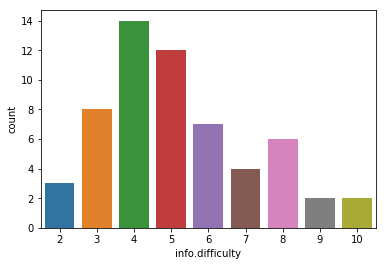

In [10]:
prva=CHAMP_TRENOVACIE[CHAMP_TRENOVACIE.rangecategory=="Melee"]
sns.countplot(x=prva["info.difficulty"])
print("Úroveň obtiažnosti hrania pre Melee Championov")

Úroveň obtiažnosťi hrania Ranged Championov


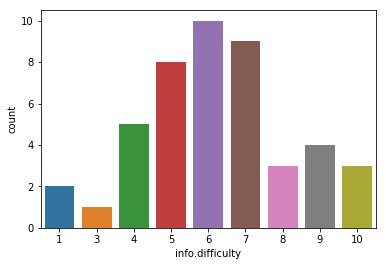

In [11]:
druha=CHAMP_TRENOVACIE[CHAMP_TRENOVACIE.rangecategory=="Ranged"]
sns.countplot(x=druha["info.difficulty"])
print("Úroveň obtiažnosťi hrania Ranged Championov")

Úroveň obtiažnosťi hrania pre Ranged/Melee Championov


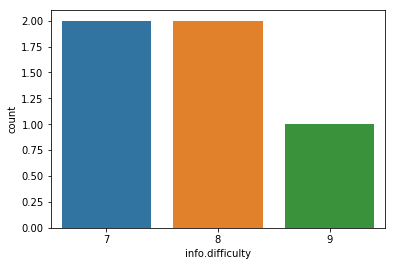

In [12]:
tretia=CHAMP_TRENOVACIE[CHAMP_TRENOVACIE.rangecategory=="Both"]
sns.countplot(x=tretia["info.difficulty"])
print("Úroveň obtiažnosťi hrania pre Ranged/Melee Championov")

Grafické porovnanie na základe Ability Power


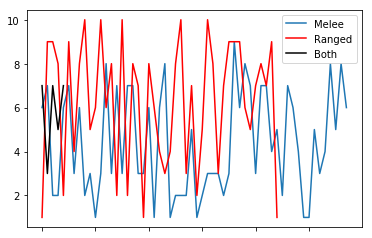

In [13]:
print("Grafické porovnanie na základe Ability Power");
ax = plt.gca()
prva.plot(kind='line',x='rangecategory',y='info.magic',ax=ax,)
druha.plot(kind='line',x='rangecategory',y='info.magic', color='red', ax=ax,)
tretia.plot(kind='line',x='rangecategory',y='info.magic', color='black', ax=ax,)
ax.legend(["Melee", "Ranged","Both"]);
ax.set_xlabel("")
plt.show()

Grafické porovnanie na základe Defense


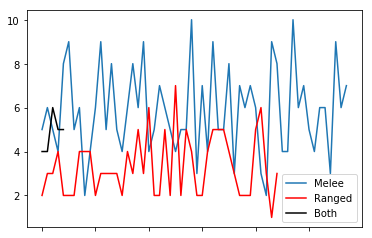

In [14]:
print("Grafické porovnanie na základe Defense");
ax = plt.gca()
prva.plot(kind='line',x='rangecategory',y='info.defense',ax=ax,)
druha.plot(kind='line',x='rangecategory',y='info.defense', color='red', ax=ax,)
tretia.plot(kind='line',x='rangecategory',y='info.defense', color='black', ax=ax,)
ax.legend(["Melee", "Ranged","Both"]);
ax.set_xlabel("")
plt.show()

/home/nbuser/anaconda3_501/lib/python3.6/site-packages/ipykernel/__main__.py:17: RuntimeWarning: overflow encountered in square


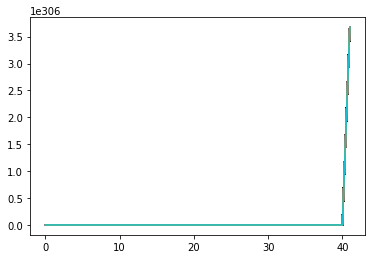

In [15]:
MojAdalineGD=AdalineGD() #Zadefinovanie vlastnej premennej s triedou Adeline GD
MojAdalineGD.fit(X,y)  

In [16]:
X1=preprocessing.scale(X) 

print("Porovnanie údajov z premennej X a preškálovaného X")
print(X[0,0],X[0,1],X[1,0],X[1,1])
print(X1[0,0],X1[0,1],X1[1,0],X1[1,1])

Porovnanie údajov z premennej X a preškálovaného X
7.0 5.0 4.0 6.0
0.5447980073122478 0.11327185900176001 -0.5554803211811156 0.5799519180890106


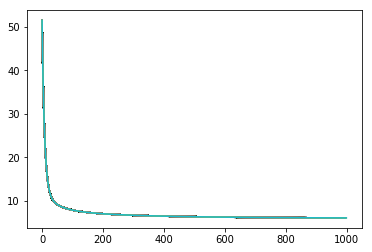

In [17]:
MojAdalineGD.fit(X1,y)

In [18]:
#Načítame údaje na testovanie
X_TEST=CHAMP_TEST.iloc[0:CHAMP_TEST.key.count(),7:30].values

X1_TEST=preprocessing.scale(X_TEST)

y_TEST=np.where(CHAMP_TEST.rangecategory.str.contains("Melee"),-1,1)

In [19]:
uspesnost= MojAdalineGD.predict(X1_TEST)

In [20]:
print('Presnosť siete je: ', accuracy_score(y_TEST, uspesnost)*100,"%")

Presnosť siete je:  95.0 %


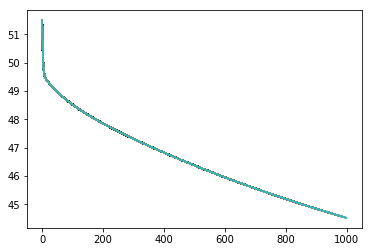

In [21]:
#Na porovnanie, kedže azure nedokáže pracovať s takými rozdielnimi údajmi
XP=CHAMP_TRENOVACIE.iloc[5:CHAMP_TRENOVACIE.key.count()+5,25:30].values
MojAdalineGD.fit(XP,y) 

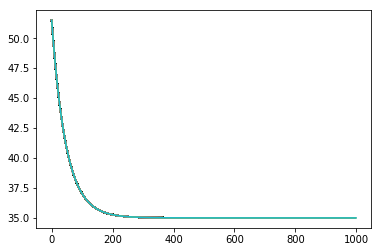

In [22]:
XPS=preprocessing.scale(XP) 
MojAdalineGD.fit(XPS,y)

In [23]:
XP_TEST=CHAMP_TEST.iloc[0:CHAMP_TEST.key.count(),25:30].values

XPS_TEST=preprocessing.scale(XP_TEST)

y_TEST=np.where(CHAMP_TEST.rangecategory.str.contains("Melee"),0,1)

In [24]:
uspesnost= MojAdalineGD.predict(XPS_TEST)

In [25]:
print('Presnosť siete je: ', accuracy_score(y_TEST, uspesnost)*100,"%")

Presnosť siete je:  42.5 %
